DATA PROCESSING

In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np


In [104]:
# Loading the dataset
df =  pd.read_csv(r'C:\Users\Admin\Downloads\archive (12)\bank-additional-full.csv', sep=';')

In [106]:
# Droping rows with missing target values
df = df.dropna(subset=['y'])

In [108]:
# Encoding the target variable
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [110]:
# Encoding categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [112]:
# Spliting the data into features and target
X = df.drop(columns=['y'])
y = df['y']

In [114]:
# Standardize the feature variables
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [116]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

TRAINING THE MODEL 

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [120]:
# Initializing and training the random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [122]:
# Predicting on the test set
y_pred = rf_model.predict(X_test)

In [124]:
# Evaluating the model
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [40]:
print(report)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10968
           1       0.65      0.51      0.57      1389

    accuracy                           0.91     12357
   macro avg       0.79      0.74      0.76     12357
weighted avg       0.91      0.91      0.91     12357

[[10584   384]
 [  683   706]]


ANALYSING FEATURE IMPORTANCE

In [98]:
import matplotlib.pyplot as plt
import numpy as np


In [126]:
obs_4 = X[3].reshape(1, -1)
obs_20 = X[19].reshape(1, -1)

In [128]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = df.drop(columns=['y']).columns

In [130]:
# Sorting feature importances in descending order
indices = np.argsort(importances)[::-1]

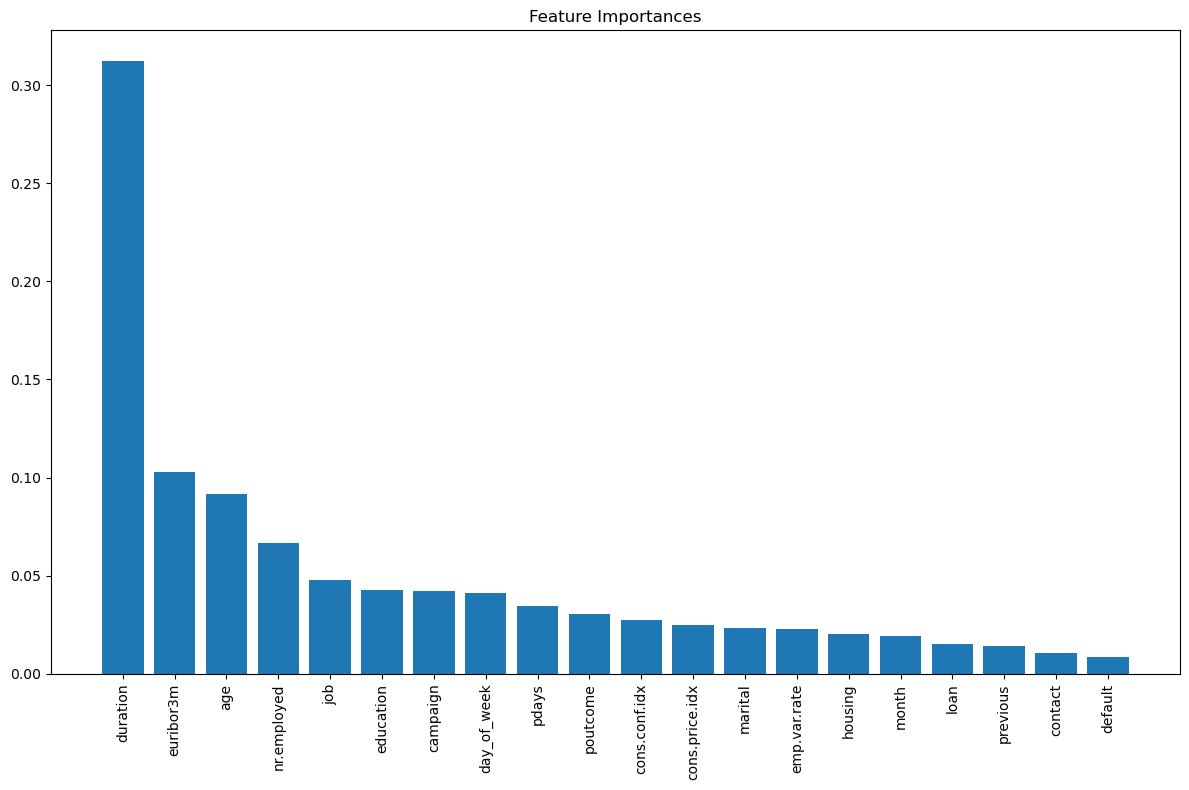

In [49]:
# Ploting the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

ANALYSING SPECIFIC OBSERVATION FOR #4 AND #20

In [132]:
import numpy as np

In [134]:
# Extracting the decision path for the random forest estimators for each observation
estimators = rf_model.estimators_

In [136]:
# Function to compute feature importances for a specific observation
def compute_feature_importances(estimator, observation):
    tree = estimator.tree_
    feature_importances = np.zeros(tree.n_features)
    for i in range(tree.node_count):
        if tree.children_left[i] == tree.children_right[i]:  # leaf node
            continue
        importance = (tree.weighted_n_node_samples[i] * tree.impurity[i] -
                      tree.weighted_n_node_samples[tree.children_left[i]] * tree.impurity[tree.children_left[i]] -
                      tree.weighted_n_node_samples[tree.children_right[i]] * tree.impurity[tree.children_right[i]])
        feature_importances[tree.feature[i]] += importance
    return feature_importances


In [138]:
# Compute feature importances for observation #4
feature_importances_4 = np.mean([compute_feature_importances(estimator,obs_4) for estimator in rf_model.estimators_], axis=0)

In [141]:
# Compute feature importances for observation #20
feature_importances_20 = np.mean([compute_feature_importances(estimator, obs_20) for estimator in rf_model.estimators_], axis=0)

In [144]:
print("Feature importances for observation #4:", feature_importances_4)
print("Feature importances for observation #20:", feature_importances_20)

Feature importances for observation #4: [ 527.91832863  277.16504381  133.99747024  247.81728655   50.41104655
  118.33545546   86.6661973    62.06445213  111.07747571  238.90853597
 1801.99654653  244.38467365  200.1942789    80.79444057  175.11764452
  131.40056458  144.7272245   158.91571882  593.69787543  385.03241992]
Feature importances for observation #20: [ 527.91832863  277.16504381  133.99747024  247.81728655   50.41104655
  118.33545546   86.6661973    62.06445213  111.07747571  238.90853597
 1801.99654653  244.38467365  200.1942789    80.79444057  175.11764452
  131.40056458  144.7272245   158.91571882  593.69787543  385.03241992]


plotting

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
feature_names = df.drop(columns=['y']).columns

In [153]:
# Create a DataFrame for feature importances for observation #4
feature_importances_df_4 = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_4
}).sort_values(by='Importance', ascending=False)

# Create a DataFrame for feature importances for observation #20
feature_importances_df_20 = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_20
}).sort_values(by='Importance', ascending=False)

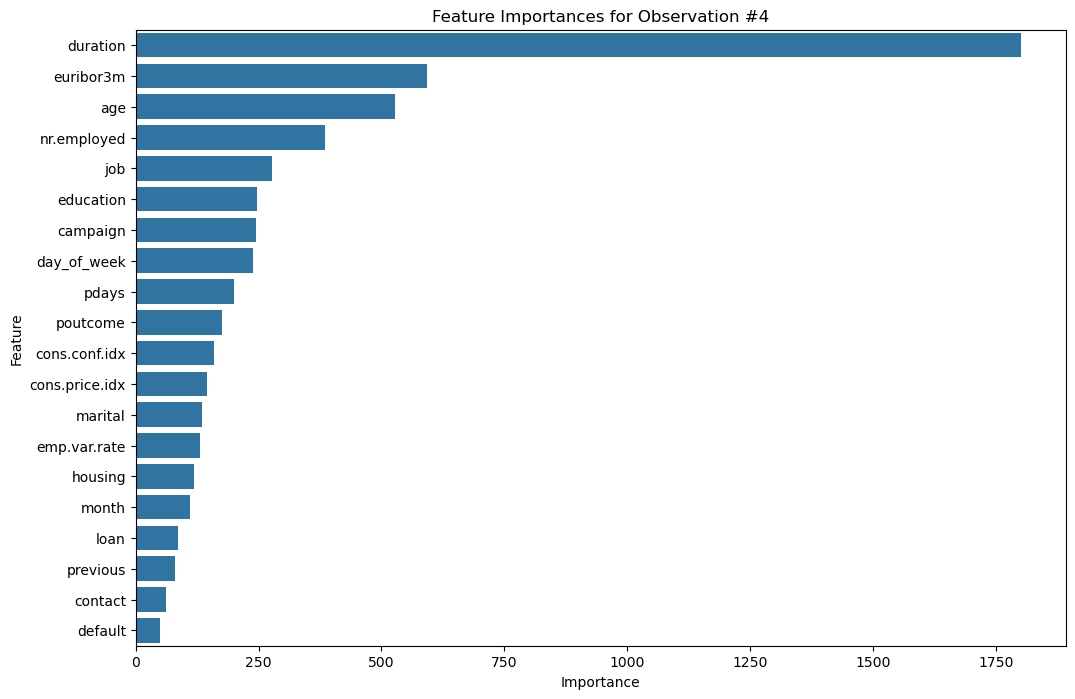

In [155]:
# Plot feature importances for observation #4
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df_4)
plt.title('Feature Importances for Observation #4')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

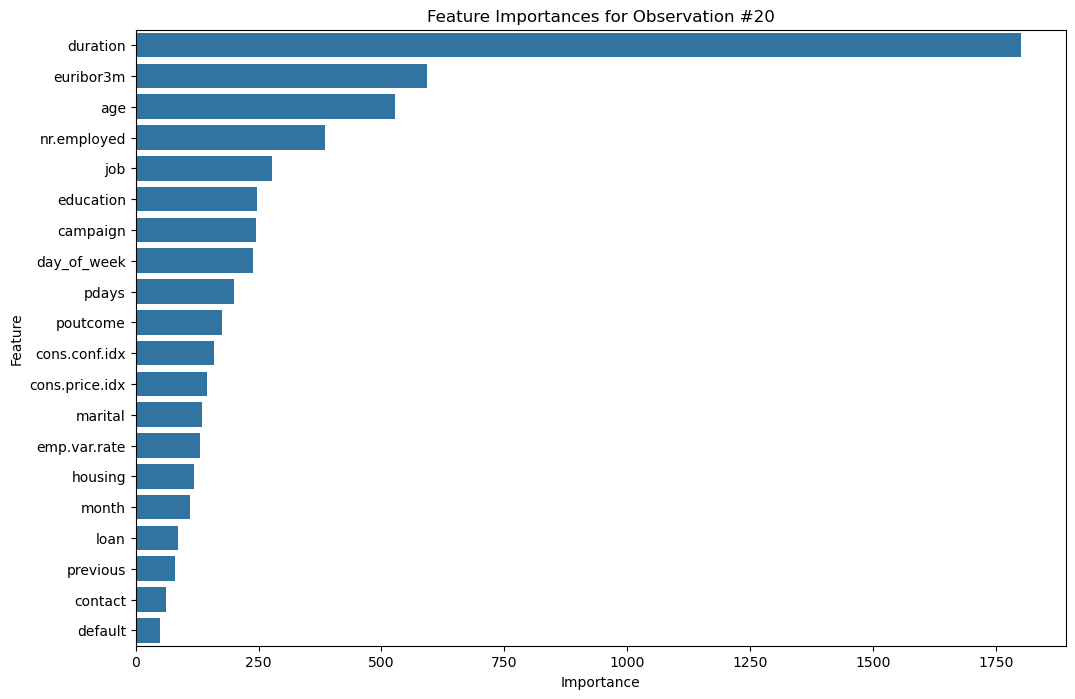

In [157]:
# Plot feature importances for observation #20
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df_20)
plt.title('Feature Importances for Observation #20')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

comments and observations

In [167]:
# Summary for observation #4
print("\nTop 5 important features for Observation #4:")
print(feature_importances_df_4.head(5))



Top 5 important features for Observation #4:
        Feature   Importance
10     duration  1801.996547
18    euribor3m   593.697875
0           age   527.918329
19  nr.employed   385.032420
1           job   277.165044


In [169]:
# Summary for observation #20
print("\nTop 5 important features for Observation #20:")
print(feature_importances_df_20.head(5))


Top 5 important features for Observation #20:
        Feature   Importance
10     duration  1801.996547
18    euribor3m   593.697875
0           age   527.918329
19  nr.employed   385.032420
1           job   277.165044
